In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings                    
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
df=pd.read_csv('segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df['ID'].nunique()

2000

In [5]:
len(df)

2000

* We will have to drop 'ID' column.

In [6]:
df['Sex'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Marital status'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59, 73, 72, 76, 71, 18], dtype=int64)

In [9]:
df['Education'].unique()

array([2, 1, 0, 3], dtype=int64)

In [10]:
df['Income'].unique()

array([124670, 150773,  89210, ...,  86400,  97968,  68416], dtype=int64)

In [11]:
df['Occupation'].unique()

array([1, 0, 2], dtype=int64)

In [12]:
df['Settlement size'].unique()

array([2, 0, 1], dtype=int64)

In [13]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [14]:
df.duplicated().sum()

0

### Data Cleaning

In [15]:
df.drop(columns='ID', inplace=True)

In [16]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


### Data Clustering

In [17]:
df1= df[['Age', 'Income']]

In [18]:
df1

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


### Elbow Curve

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss=[]

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

print(wcss)

[2903113028798.3184, 1214585352990.44, 678990631905.9109, 377617822126.916, 249071727558.71503, 177226122343.8631, 130674982376.84091, 96586459068.60199, 81247546109.6423, 66951241976.16115]


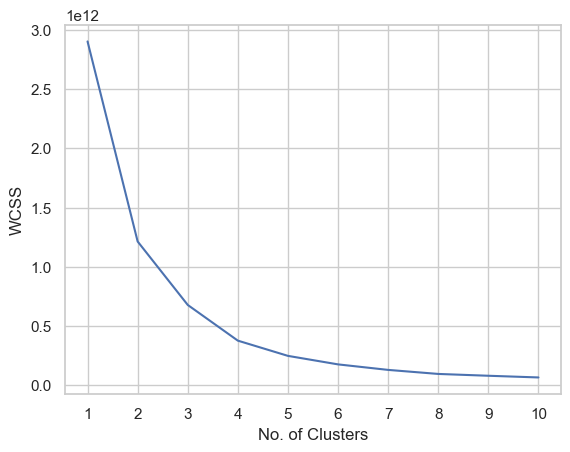

In [21]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

* Ideal number of Clusters appear to be 5

### K-Means Model

In [22]:
# modelling

kmeans = KMeans(n_clusters = 5, init = 'k-means++')

In [23]:
# prediction

y_kmeans = kmeans.fit_predict(df1)

In [24]:
y_kmeans

array([0, 4, 3, ..., 1, 3, 1])

In [25]:
#extra

y_kmeans=pd.DataFrame(y_kmeans)

In [26]:
df1['Cluster']= pd.DataFrame(y_kmeans)
df1

,Age,Income,Cluster
0,67,124670,0
1,22,150773,4
2,49,89210,3
3,45,171565,4
4,53,149031,4
...,...,...,...
1995,47,123525,0
1996,27,117744,0
1997,31,86400,1
1998,24,97968,3


### Data Visualization (K-Means Clustering)

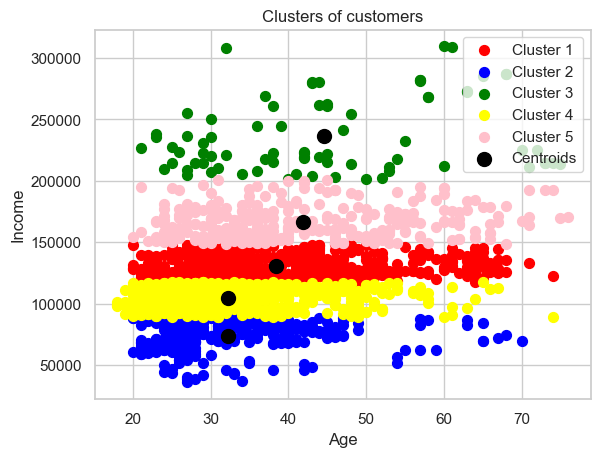

In [27]:

plt.scatter(df1.loc[df1['Cluster'] == 0, 'Age'], df1.loc[df1['Cluster'] == 0, 'Income'], s=50, c='red', label='Cluster 1')

plt.scatter(df1.loc[df1['Cluster'] == 1, 'Age'], df1.loc[df1['Cluster'] == 1, 'Income'], s=50, c='blue', label='Cluster 2')

plt.scatter(df1.loc[df1['Cluster'] == 2, 'Age'], df1.loc[df1['Cluster'] == 2, 'Income'], s=50, c='green', label='Cluster 3')

plt.scatter(df1.loc[df1['Cluster'] == 3, 'Age'], df1.loc[df1['Cluster'] == 3, 'Income'], s=50, c='yellow', label='Cluster 4')

plt.scatter(df1.loc[df1['Cluster'] == 4, 'Age'], df1.loc[df1['Cluster'] == 4, 'Income'], s=50, c='pink', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


* You can see that some clusters consist of younger customers with lower incomes, while others are made up of older customers with higher incomes.
* The centroids indicate the average profile for each cluster.

### Hierarchical Clustering

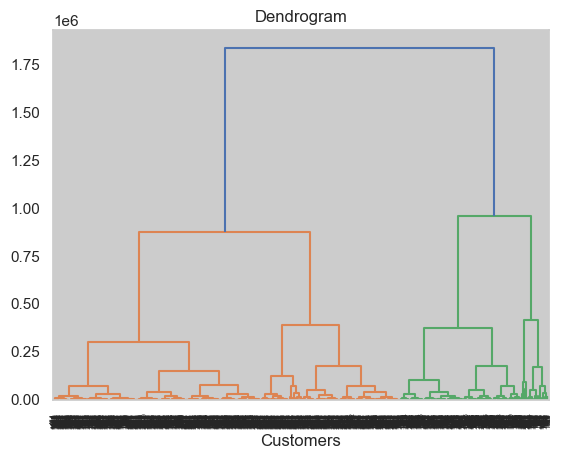

In [28]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(df1, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

hc= AgglomerativeClustering(n_clusters=5, metric = 'euclidean' , linkage= 'ward' )
y_hc= hc.fit_predict(df1)
y_hc

array([1, 2, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_hc= pd.DataFrame(y_hc)

In [39]:
df2=df1.drop(columns='Cluster')

In [40]:
df2

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


In [41]:
df2['Cluster']= pd.DataFrame(y_hc)
df2

,Age,Income,Cluster
0,67,124670,1
1,22,150773,2
2,49,89210,0
3,45,171565,2
4,53,149031,2
...,...,...,...
1995,47,123525,1
1996,27,117744,1
1997,31,86400,0
1998,24,97968,0


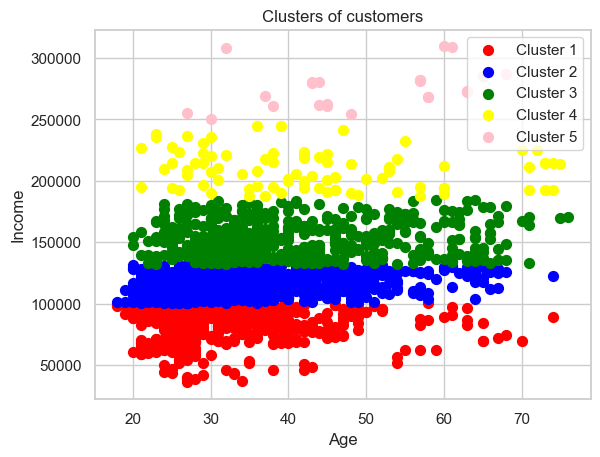

In [44]:
plt.scatter(df2.loc[df2['Cluster'] == 0, 'Age'], df2.loc[df2['Cluster'] == 0, 'Income'], s=50, c='red', label='Cluster 1')

plt.scatter(df2.loc[df2['Cluster'] == 1, 'Age'], df2.loc[df2['Cluster'] == 1, 'Income'], s=50, c='blue', label='Cluster 2')

plt.scatter(df2.loc[df2['Cluster'] == 2, 'Age'], df2.loc[df2['Cluster'] == 2, 'Income'], s=50, c='green', label='Cluster 3')

plt.scatter(df2.loc[df2['Cluster'] == 3, 'Age'], df2.loc[df2['Cluster'] == 3, 'Income'], s=50, c='yellow', label='Cluster 4')

plt.scatter(df2.loc[df2['Cluster'] == 4, 'Age'], df2.loc[df2['Cluster'] == 4, 'Income'], s=50, c='pink', label='Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

* There is no strong correlation between age and income within individual clusters, as each cluster spans nearly the entire age range (20-70 years).
* The horizontal clustering pattern indicates that age alone is not a significant predictor of income level in this dataset.
* The clear income-based segmentation suggests that marketing strategies should be tailored primarily to income levels rather than age demographics.
* Each income tier represents a distinct customer segment that likely has different purchasing behaviors and product preferences.

### DBSCAN

In [89]:
from sklearn.cluster import DBSCAN

for r in range(1, 11):
    
    for m in range(3, 11):
   
        dbs = DBSCAN(eps=r, min_samples=m)
        
        y_dbs = dbs.fit_predict(df1)
        
        db = pd.DataFrame()
        db["cluster"] = pd.DataFrame(y_dbs)
        
        if db["cluster"].nunique() == 6:
            break

    if db["cluster"].nunique() == 6:
        break

print(f"Optimal parameters: eps={r}, min_samples={m}")
print(f"Number of clusters found: {db['cluster'].nunique()}")

    

Optimal parameters: eps=7, min_samples=3
Number of clusters found: 6


In [90]:
dbs= DBSCAN(eps=7, min_samples=3)

y_dbs= dbs.fit_predict(df1)

In [91]:
df3=df2.drop(columns='Cluster')
df3

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


In [92]:
df3['Cluster']= pd.DataFrame(y_dbs)
df3

,Age,Income,Cluster
0,67,124670,-1
1,22,150773,-1
2,49,89210,-1
3,45,171565,-1
4,53,149031,-1
...,...,...,...
1995,47,123525,-1
1996,27,117744,-1
1997,31,86400,-1
1998,24,97968,-1


In [93]:
df3['Cluster'].unique()

array([-1,  4,  0,  1,  2,  3], dtype=int64)

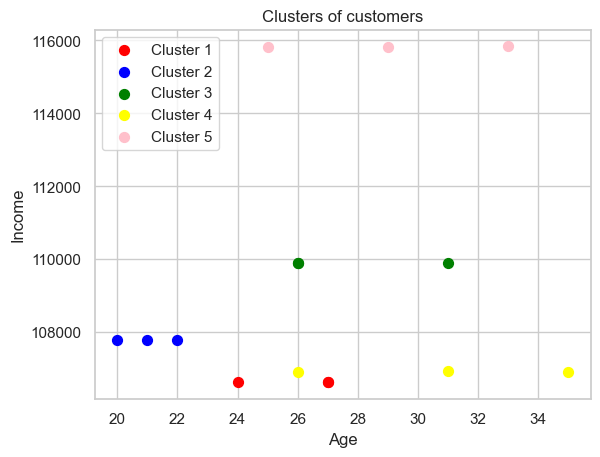

In [94]:
plt.scatter(df3.loc[df3['Cluster'] == 0, 'Age'], df3.loc[df3['Cluster'] == 0, 'Income'], s=50, c='red', label='Cluster 1')

plt.scatter(df3.loc[df3['Cluster'] == 1, 'Age'], df3.loc[df3['Cluster'] == 1, 'Income'], s=50, c='blue', label='Cluster 2')

plt.scatter(df3.loc[df3['Cluster'] == 2, 'Age'], df3.loc[df3['Cluster'] == 2, 'Income'], s=50, c='green', label='Cluster 3')

plt.scatter(df3.loc[df3['Cluster'] == 3, 'Age'], df3.loc[df3['Cluster'] == 3, 'Income'], s=50, c='yellow', label='Cluster 4')

plt.scatter(df3.loc[df3['Cluster'] == 4, 'Age'], df3.loc[df3['Cluster'] == 4, 'Income'], s=50, c='pink', label='Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()